In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,log_loss,precision_score,recall_score,jaccard_score,hamming_loss,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from keras.models import load_model

In [ ]:
df = pd.read_csv('MI.data',na_values='?')
column_names = ['ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K', 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
df.columns=column_names

for col in df.columns:
  if(df[col].isin([0,1,2,3,4,5,np.nan]).all()):
    df[col]=df[col].fillna(df[col].mode()[0])
  else:
    df[col]=df[col].fillna(df[col].median())


x=df.iloc[:,2:75]
y=df.iloc[:,123]

features=['SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL',
       'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02',
       'nr_03', 'nr_04', 'np_05', 'np_08', 'np_10', 'endocr_02', 'zab_leg_01',
       'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG',
       'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'K_SH_POST', 'MP_TP_POST',
       'SVT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im',
       'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_07',
       'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_05',
       'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_p_ecg_p_03', 'n_p_ecg_p_08',
       'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12']

x=x[features]

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)





In [ ]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
model.fit(x_train,y_train)
y_pred_probs=model.predict_proba(x_test)

In [ ]:
model1=LogisticRegression(multi_class='multinomial',solver='newton-cg', random_state=42)
model1.fit(x_train,y_train)
y_pred1_probs=model1.predict_proba(x_test)

In [ ]:
model2=DecisionTreeClassifier(criterion='gini', random_state=42)
model2.fit(x_train,y_train)
y_pred2_probs=model2.predict_proba(x_test)

In [ ]:
model3 = KNeighborsClassifier(n_neighbors=2)
model3.fit(x_train, y_train)
y_pred3_probs=model3.predict_proba(x_test)

In [ ]:
model4 = load_model('LSTM3_52feat_160epochs.keras')
y_pred4_probs=model4.predict(x_test)

72/72 [==============================] - 4s 24ms/step


In [ ]:
model5=GaussianNB()
model5.fit(x_train,y_train)
y_pred5_probs=model5.predict_proba(x_test)

In [ ]:
model6=SGDClassifier(loss = 'log')
model6.fit(x_train,y_train)
y_pred6_probs=model6.predict_proba(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [ ]:
model7=SVC(probability=True)
model7.fit(x_train,y_train)
y_pred7_probs=model7.predict_proba(x_test)

In [ ]:
lb = LabelBinarizer()
y_test_bin=lb.fit_transform(y_test)
print(y_test_bin)

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [ ]:
fpr_1, tpr_1, _ = roc_curve(y_test_bin.ravel(), model)
auc_1 = roc_auc_score(y_test_bin.ravel(), model)
fpr_2, tpr_2, _ = roc_curve(y_test_bin.ravel(), model1)
auc_2 = roc_auc_score(y_test_bin.ravel(), model1)

TypeError: ignored

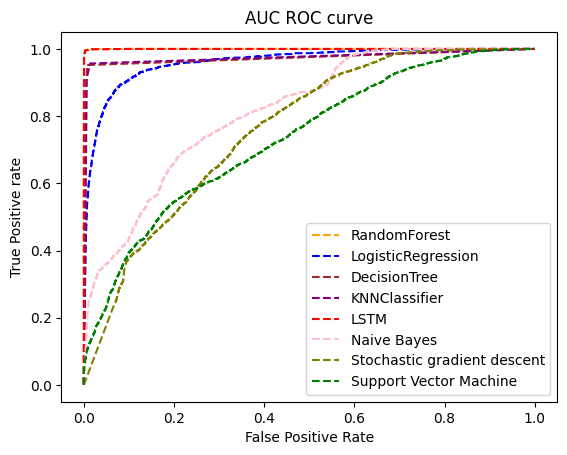

In [ ]:
fpr,tpr,thresh=roc_curve(y_test_bin.ravel(),y_pred_probs.ravel())
fpr1,tpr1,thresh1=roc_curve(y_test_bin.ravel(),y_pred1_probs.ravel())
fpr2,tpr2,thresh2=roc_curve(y_test_bin.ravel(),y_pred2_probs.ravel())
fpr3,tpr3,thresh3=roc_curve(y_test_bin.ravel(),y_pred3_probs.ravel())
fpr4,tpr4,thresh4=roc_curve(y_test_bin.ravel(),y_pred4_probs.ravel())
fpr5,tpr5,thresh5=roc_curve(y_test_bin.ravel(),y_pred5_probs.ravel())
fpr6,tpr6,thresh6=roc_curve(y_test_bin.ravel(),y_pred6_probs.ravel())
fpr7,tpr7,thresh7=roc_curve(y_test_bin.ravel(),y_pred7_probs.ravel())

plt.plot(fpr, tpr, linestyle='--',color='orange', label='RandomForest')
plt.plot(fpr1, tpr1, linestyle='--',color='blue', label='LogisticRegression')
plt.plot(fpr2, tpr2, linestyle='--',color='brown', label='DecisionTree')
plt.plot(fpr3, tpr3, linestyle='--',color='purple', label='KNNClassifier')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='LSTM')
plt.plot(fpr5, tpr5, linestyle='--',color='pink', label='Naive Bayes')
plt.plot(fpr6, tpr6, linestyle='--',color='olive', label='Stochastic gradient descent')
plt.plot(fpr7, tpr7, linestyle='--',color='green', label='Support Vector Machine')
plt.title('AUC ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

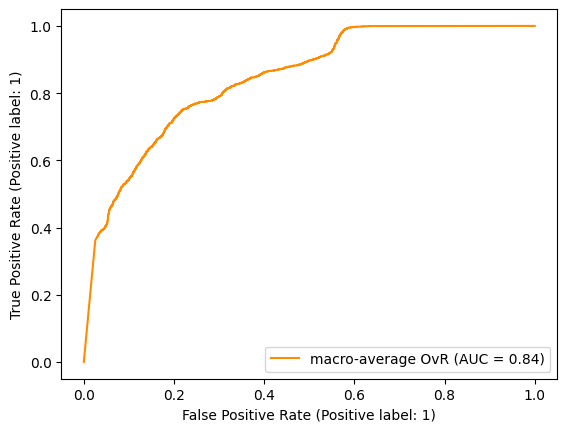

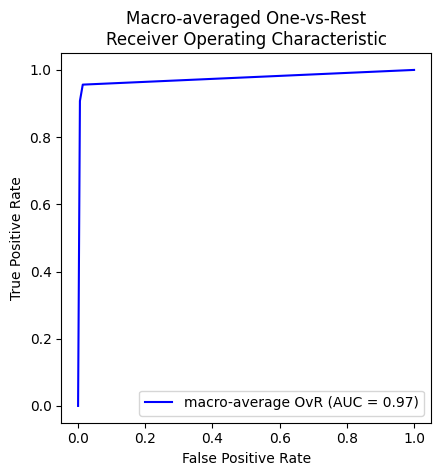

In [ ]:
RocCurveDisplay.from_predictions(
    y_test_bin.ravel(),
    y_pred5_probs.ravel(),
    name="macro-average OvR",
    color="darkorange",
    #plot_chance_level=True,
)
RocCurveDisplay.from_predictions(
    y_test_bin.ravel(),
    y_pred3_probs.ravel(),
    name="macro-average OvR",
    color="blue",
    #plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()